## Imports and data loading

In [13]:
# Import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

In [2]:
# Load dataset into dataframe
data = pd.read_csv('tiktok_dataset.csv')
data.head(10) ## Display and examine the first 10 rows of the dataframe

,#,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
0,1,claim,7017666017,59,someone shared with me that drone deliveries a...,not verified,under review,343296.0,19425.0,241.0,1.0,0.0
1,2,claim,4014381136,32,someone shared with me that there are more mic...,not verified,active,140877.0,77355.0,19034.0,1161.0,684.0
2,3,claim,9859838091,31,someone shared with me that american industria...,not verified,active,902185.0,97690.0,2858.0,833.0,329.0
3,4,claim,1866847991,25,someone shared with me that the metro of st. p...,not verified,active,437506.0,239954.0,34812.0,1234.0,584.0
4,5,claim,7105231098,19,someone shared with me that the number of busi...,not verified,active,56167.0,34987.0,4110.0,547.0,152.0
5,6,claim,8972200955,35,someone shared with me that gross domestic pro...,not verified,under review,336647.0,175546.0,62303.0,4293.0,1857.0
6,7,claim,4958886992,16,someone shared with me that elvis presley has ...,not verified,active,750345.0,486192.0,193911.0,8616.0,5446.0
7,8,claim,2270982263,41,someone shared with me that the best selling s...,not verified,active,547532.0,1072.0,50.0,22.0,11.0
8,9,claim,5235769692,50,someone shared with me that about half of the ...,not verified,active,24819.0,10160.0,1050.0,53.0,27.0
9,10,claim,4660861094,45,someone shared with me that it would take a 50...,verified,active,931587.0,171051.0,67739.0,4104.0,2540.0


## Understand the data - Inspect the data

In [3]:
# Get summary info
data.info() 


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19382 entries, 0 to 19381
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   #                         19382 non-null  int64  
 1   claim_status              19084 non-null  object 
 2   video_id                  19382 non-null  int64  
 3   video_duration_sec        19382 non-null  int64  
 4   video_transcription_text  19084 non-null  object 
 5   verified_status           19382 non-null  object 
 6   author_ban_status         19382 non-null  object 
 7   video_view_count          19084 non-null  float64
 8   video_like_count          19084 non-null  float64
 9   video_share_count         19084 non-null  float64
 10  video_download_count      19084 non-null  float64
 11  video_comment_count       19084 non-null  float64
dtypes: float64(5), int64(3), object(4)
memory usage: 1.8+ MB


- The dataframe contains a collection of categorical, text, and numerical data
- Each row represents a distinct TikTok video that presents either a claim or an opinion and the accompanying metadata about that video.
- The dataframe contains five float64s, three int64s, and four objects. 
- There are 19,382 observations, but some of the variables are missing values, including claim status, the video transcripton, and all of the count variables.

In [4]:
# Get summary statistics
data.describe()

,#,video_id,video_duration_sec,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
count,19382.000000,1.938200e+04,19382.000000,19084.000000,19084.000000,19084.000000,19084.000000,19084.000000
mean,9691.500000,5.627454e+09,32.421732,254708.558688,84304.636030,16735.248323,1049.429627,349.312146
std,5595.245794,2.536440e+09,16.229967,322893.280814,133420.546814,32036.174350,2004.299894,799.638865
min,1.000000,1.234959e+09,5.000000,20.000000,0.000000,0.000000,0.000000,0.000000
25%,4846.250000,3.430417e+09,18.000000,4942.500000,810.750000,115.000000,7.000000,1.000000
50%,9691.500000,5.618664e+09,32.000000,9954.500000,3403.500000,717.000000,46.000000,9.000000
75%,14536.750000,7.843960e+09,47.000000,504327.000000,125020.000000,18222.000000,1156.250000,292.000000
max,19382.000000,9.999873e+09,60.000000,999817.000000,657830.000000,256130.000000,14994.000000,9599.000000


- Many of the count variables seem to have outliers at the high end of the distribution. They have very large standard deviations and maximum values that are very high compared to their quartile values.

## Understand the data - Investigate the variables

In [5]:
# What are the different values for claim status and how many of each are in the data?
data['claim_status'].value_counts()

claim_status
claim      9608
opinion    9476
Name: count, dtype: int64

- The counts of each claim status are quite balanced.

#### examine the engagement trends associated with each different claim status.

In [6]:
# What is the average view count of videos with "claim" status?
avg_view_claim = data[data['claim_status'] == 'claim']['video_view_count'].mean()
print('Mean view count claims:', avg_view_claim)

median_view_claim = data[data['claim_status'] == 'claim']['video_view_count'].median()
print('Median view count claims:', median_view_claim)

Mean view count claims: 501029.4527477102
Median view count claims: 501555.0


In [7]:
# What is the average view count of videos with "opinion" status?
avg_view_opinion = data[data['claim_status'] == 'opinion']['video_view_count'].mean()
print('Mean view count opinions:', avg_view_opinion)

median_view_opinion = data[data['claim_status'] == 'opinion']['video_view_count'].median()
print('Median view count opinions:', median_view_opinion)

Mean view count opinions: 4956.43224989447
Median view count opinions: 4953.0


- The mean and the median within each claim category are close to one another, but there is a vast discrepancy between view counts for videos labeled as claims and videos labeled as opinions.

In [8]:
# Get counts for each group combination of claim status and author ban status
data.groupby(['claim_status','author_ban_status']).count()[['#']]

#
claim_status author_ban_status      
claim        active             6566
             banned             1439
             under review       1603
opinion      active             8817
             banned              196
             under review        463

- There are many more claim videos with banned authors than there are opinion videos with banned authors. This could mean a number of things, including the possibilities that:

    + Claim videos are more strictly policed than opinion videos
    + Authors must comply with a stricter set of rules if they post a claim than if they post an opinion
Also, it should be noted that there's no way of knowing if claim videos are inherently more likely than opinion videos to result in author bans, or if authors who post claim videos are more likely to post videos that violate terms of service.


In [9]:
# What's the median video share count of each author ban status?
data.groupby(['author_ban_status'])[['video_share_count']].median(numeric_only=True)

,video_share_count
author_ban_status,
active,437.0
banned,14468.0
under review,9444.0


- Banned authors have a median share count that's 33 times the median share count of active authors! Explore this in more depth.



In [10]:

grouped_data = data.groupby('author_ban_status').agg({
    'video_view_count': ['count', 'mean', 'median'],
    'video_like_count': ['count', 'mean', 'median'],
    'video_share_count': ['count', 'mean', 'median']
})
grouped_data

video_view_count                          video_like_count  \
                             count           mean    median            count   
author_ban_status                                                              
active                       15383  215927.039524    8616.0            15383   
banned                        1635  445845.439144  448201.0             1635   
under review                  2066  392204.836399  365245.5             2066   

                                           video_share_count                \
                            mean    median             count          mean   
author_ban_status                                                            
active              71036.533836    2222.0             15383  14111.466164   
banned             153017.236697  105573.0              1635  29998.942508   
under review       128718.050339   71204.5              2066  25774.696999   

                            
                    median  
author_ban_status           
active               437.0  
banned             14468.0  
under review        9444.0

- A few observations stand out:

    + Banned authors and those under review get far more views, likes, and shares than active authors.
    + In most groups, the mean is much greater than the median, which indicates that there are some videos with very high engagement counts.


In [11]:
# Create a likes_per_view column
data['likes_per_view'] = data['video_like_count']/data['video_view_count']


# Create a comments_per_view column
data['comments_per_view'] = data['video_comment_count'] /data['video_view_count']

# Create a shares_per_view column
data['shares_per_view'] = data['video_share_count'] /data['video_view_count']

data.head()

,#,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count,likes_per_view,comments_per_view,shares_per_view
0,1,claim,7017666017,59,someone shared with me that drone deliveries a...,not verified,under review,343296.0,19425.0,241.0,1.0,0.0,0.056584,0.000000,0.000702
1,2,claim,4014381136,32,someone shared with me that there are more mic...,not verified,active,140877.0,77355.0,19034.0,1161.0,684.0,0.549096,0.004855,0.135111
2,3,claim,9859838091,31,someone shared with me that american industria...,not verified,active,902185.0,97690.0,2858.0,833.0,329.0,0.108282,0.000365,0.003168
3,4,claim,1866847991,25,someone shared with me that the metro of st. p...,not verified,active,437506.0,239954.0,34812.0,1234.0,584.0,0.548459,0.001335,0.079569
4,5,claim,7105231098,19,someone shared with me that the number of busi...,not verified,active,56167.0,34987.0,4110.0,547.0,152.0,0.622910,0.002706,0.073175


In [12]:
grouped_data_new = data.groupby(['claim_status','author_ban_status']).agg({
    'likes_per_view': ['count', 'mean', 'median'],
    'comments_per_view': ['count', 'mean', 'median'],
    'shares_per_view': ['count', 'mean', 'median']
})
grouped_data_new

likes_per_view                      \
                                        count      mean    median   
claim_status author_ban_status                                      
claim        active                      6566  0.329542  0.326538   
             banned                      1439  0.345071  0.358909   
             under review                1603  0.327997  0.320867   
opinion      active                      8817  0.219744  0.218330   
             banned                       196  0.206868  0.198483   
             under review                 463  0.226394  0.228051   

                               comments_per_view                      \
                                           count      mean    median   
claim_status author_ban_status                                         
claim        active                         6566  0.001393  0.000776   
             banned                         1439  0.001377  0.000746   
             under review                   1603  0.001367  0.000789   
opinion      active                         8817  0.000517  0.000252   
             banned                          196  0.000434  0.000193   
             under review                    463  0.000536  0.000293   

                               shares_per_view                      
                                         count      mean    median  
claim_status author_ban_status                                      
claim        active                       6566  0.065456  0.049279  
             banned                       1439  0.067893  0.051606  
             under review                 1603  0.065733  0.049967  
opinion      active                       8817  0.043729  0.032405  
             banned                        196  0.040531  0.030728  
             under review                  463  0.044472  0.035027

- We know that videos by banned authors and those under review tend to get far more views, likes, and shares than videos by non-banned authors. However, when a video does get viewed, its engagement rate is less related to author ban status and more related to its claim status.

- Also, we know that claim videos have a higher view rate than opinion videos, but this tells us that claim videos also have a higher rate of likes on average, so they are more favorably received as well. Furthermore, they receive more engagement via comments and shares than opinion videos.

- Note that for claim videos, banned authors have slightly higher likes/view and shares/view rates than active authors or those under review. However, for opinion videos, active authors and those under review both get higher engagement rates than banned authors in all categories.

- Returning to the purpose of this analysis, at this point in the investigation it seems that engagement level is strongly correlated with claim status, and this should be a focus of further inquiry.

- After looking at the dataset, the two variables that are most likely to help build a predictive model are claim_status and opinion_status. Those two variables are most likely to be helpful because those variables denote claims and opinions. That way, we can create a classification model to differentiate the two variables, as instructed from the employer.

- The mean is larger than the median, so the data is right-skewed. Therefore, it is recommended to consider applying a variable transformation, such as taking logarithms, prior to modeling.

Text(0.5, 1.0, 'Video duration')

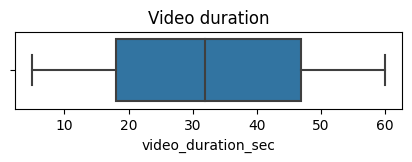

In [16]:
# Create a boxplot to visualize distribution of `video_duration_sec`
plt.figure(figsize= (5,1))
sns.boxplot(x = data['video_duration_sec'])
plt.title('Video duration')

Text(0.5, 1.0, 'Video duration histogram')

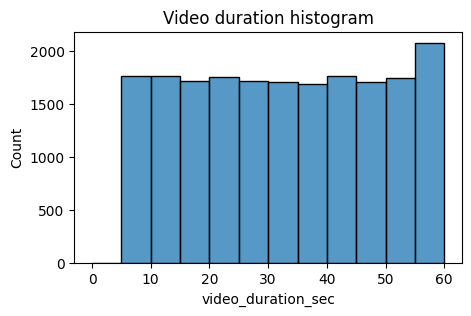

In [18]:
# Create a histogram
plt.figure(figsize=(5,3))
sns.histplot(data['video_duration_sec'], bins = range(0,61,5))
plt.title('Video duration histogram')

- All videos are 5-60 seconds in length, and the distribution is uniform.

<Axes: title={'center': 'video_view_count'}, xlabel='video_view_count'>

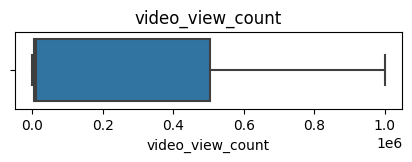

In [19]:
# Create a boxplot to visualize distribution of `video_view_count`
plt.figure(figsize=(5,1))
plt.title('video_view_count')
sns.boxplot(x = data['video_view_count'])

Text(0.5, 1.0, 'video view count histogram')

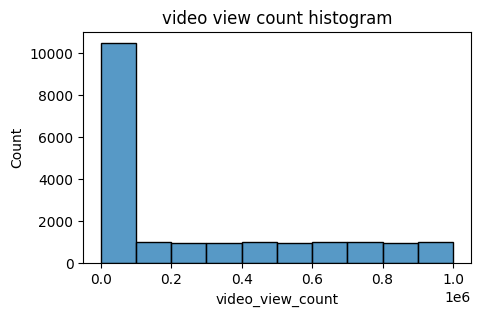

In [21]:
# Create a histogram
plt.figure(figsize=(5,3))
sns.histplot(data['video_view_count'], bins=range(0,(10**6+1),10**5))
plt.title('video view count histogram')

- This variable has a very uneven distribution, with more than half the videos receiving fewer than 100,000 views. Distribution of view counts > 100,000 views is uniform.

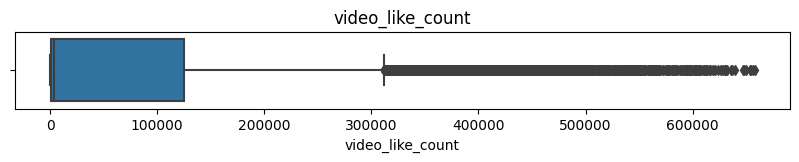

In [22]:
# Create a boxplot to visualize distribution of `video_like_count`
plt.figure(figsize=(10,1))
plt.title('video_like_count')
sns.boxplot(x=data['video_like_count']);

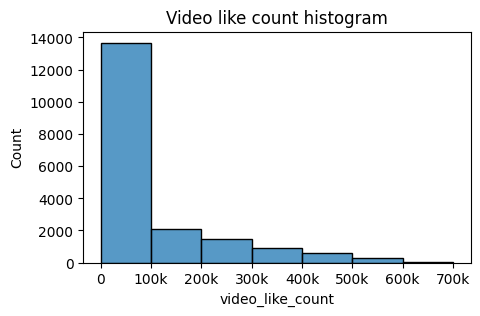

In [23]:
# Create a histogram
plt.figure(figsize=(5,3))
ax = sns.histplot(data['video_like_count'], bins=range(0,(7*10**5+1),10**5))
labels = [0] + [str(i) + 'k' for i in range(100, 701, 100)]
ax.set_xticks(range(0,7*10**5+1,10**5), labels=labels)
plt.title('Video like count histogram');

- Similar to view count, there are far more videos with < 100,000 likes than there are videos with more. However, in this case, there is more of a taper, as the data skews right, with many videos at the upper extremity of like count.

<Axes: xlabel='video_comment_count'>

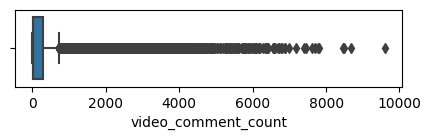

In [24]:
# Create a boxplot to visualize distribution of `video_comment_count`
plt.figure(figsize=(5,1))
sns.boxplot(x = data['video_comment_count'])

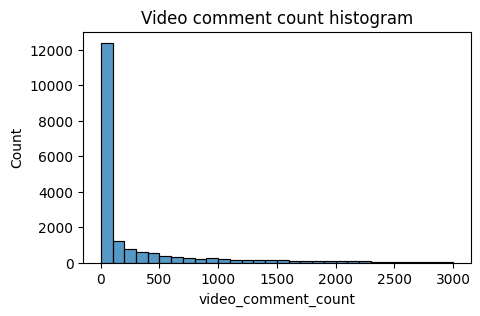

In [25]:
plt.figure(figsize=(5,3))
sns.histplot(data['video_comment_count'], bins=range(0,(3001),100))
plt.title('Video comment count histogram');

- Again, the vast majority of videos are grouped at the bottom of the range of values for video comment count. Most videos have fewer than 100 comments. The distribution is very right-skewed.

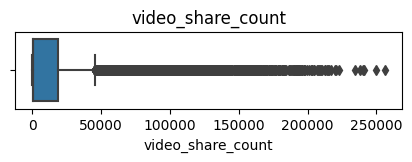

In [26]:
# Create a boxplot to visualize distribution of `video_share_count`
plt.figure(figsize=(5,1))
plt.title('video_share_count')
sns.boxplot(x=data['video_share_count']);

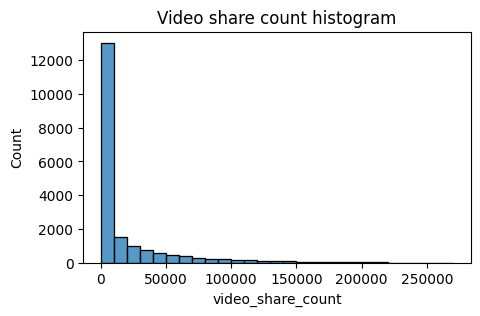

In [27]:
plt.figure(figsize=(5,3))
sns.histplot(data['video_share_count'], bins=range(0,(270001),10000))
plt.title('Video share count histogram');

- The overwhelming majority of videos had fewer than 10,000 shares. The distribution is very skewed to the right.

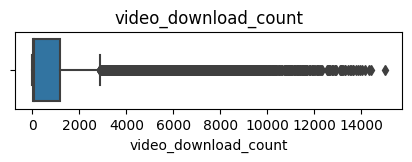

In [28]:
# Create a boxplot to visualize distribution of `video_download_count`
plt.figure(figsize=(5,1))
plt.title('video_download_count')
sns.boxplot(x=data['video_download_count']);

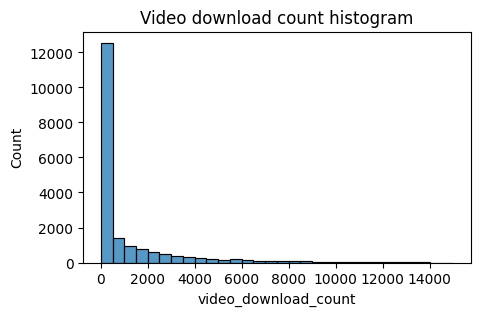

In [29]:
plt.figure(figsize=(5,3))
sns.histplot(data['video_download_count'], bins=range(0,(15001),500))
plt.title('Video download count histogram');

- The majority of videos were downloaded fewer than 500 times, but some were downloaded over 12,000 times. Again, the data is very skewed to the right.

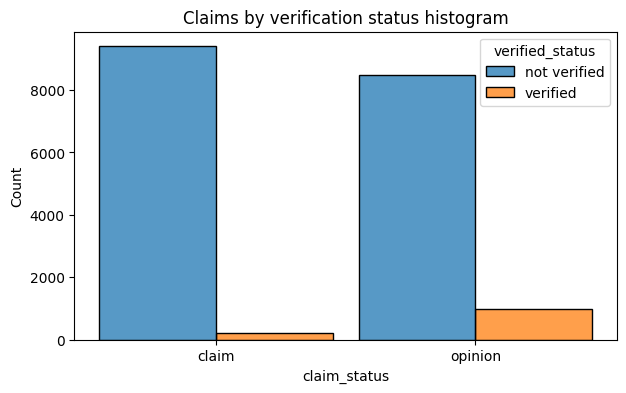

In [30]:
# create a histogram with four bars: one for each combination of claim status and verification status.
plt.figure(figsize=(7,4))
sns.histplot(data=data,
             x='claim_status',
             hue='verified_status',
             multiple='dodge',
             shrink=0.9)
plt.title('Claims by verification status histogram');

- There are far fewer verified users than unverified users, but if a user is verified, they are much more likely to post opinions.`

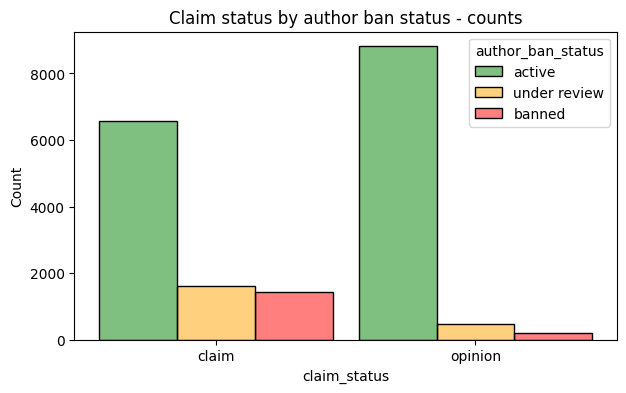

In [31]:
fig = plt.figure(figsize=(7,4))
sns.histplot(data, x='claim_status', hue='author_ban_status',
             multiple='dodge',
             hue_order=['active', 'under review', 'banned'],
             shrink=0.9,
             palette={'active':'green', 'under review':'orange', 'banned':'red'},
             alpha=0.5)
plt.title('Claim status by author ban status - counts');

- For both claims and opinions, there are many more active authors than banned authors or authors under review; however, the proportion of active authors is far greater for opinion videos than for claim videos. Again, it seems that authors who post claim videos are more likely to come under review and/or get banned.

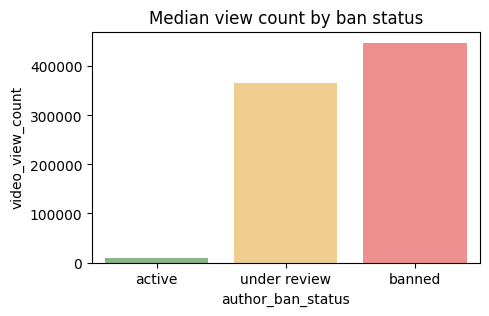

In [32]:
ban_status_counts = data.groupby(['author_ban_status']).median(
    numeric_only=True).reset_index()

fig = plt.figure(figsize=(5,3))
sns.barplot(data=ban_status_counts,
            x='author_ban_status',
            y='video_view_count',
            order=['active', 'under review', 'banned'],
            palette={'active':'green', 'under review':'orange', 'banned':'red'},
            alpha=0.5)
plt.title('Median view count by ban status');

- The median view counts for non-active authors are many times greater than the median view count for active authors. Since you know that non-active authors are more likely to post claims, and that videos by non-active authors get far more views on aggregate than videos by active authors, then video_view_count might be a good indicator of claim status.


In [33]:
data.groupby('claim_status')['video_view_count'].median()

claim_status
claim      501555.0
opinion      4953.0
Name: video_view_count, dtype: float64

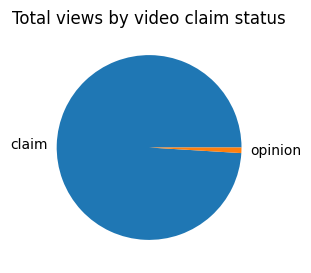

In [34]:
fig = plt.figure(figsize=(3,3))
plt.pie(data.groupby('claim_status')['video_view_count'].sum(), labels=['claim', 'opinion'])
plt.title('Total views by video claim status');

- The overall view count is dominated by claim videos even though there are roughly the same number of each video in the dataset.